In [ ]:
!pip install tensorflow

In [ ]:
!pip install tensorflow

import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, GlobalMaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.metrics import Precision, Recall

# 데이터 로드 및 레이블 '2' 제거
file_path = 'merged_reviews.csv'  # 실제 파일 경로로 변경하세요.
data = pd.read_csv(file_path)
data = data[data['label'] != 2]

# NaN 값 제거
data = data.dropna(subset=['cleaned', 'label'])

# 토크나이저 초기화 및 설정
tokenizer = Tokenizer(num_words=6000, oov_token="<OOV>")
tokenizer.fit_on_texts(data['cleaned'].astype(str))

# 장르별로 처리
genres = data['genre'].unique()
results = []

for genre in genres:
    print(f"Processing genre: {genre}")
    genre_data = data[data['genre'] == genre]

    # 토크나이즈 및 시퀀스 패딩
    sequences = tokenizer.texts_to_sequences(genre_data['cleaned'].astype(str))
    padded_sequences = pad_sequences(sequences, maxlen=130, padding='post', truncating='post')

    # 데이터 길이 확인 및 일치 여부 체크
    labels = np.array(genre_data['label'])
    if len(padded_sequences) != len(labels):
        print(f"Data length mismatch in genre {genre}: {len(padded_sequences)} vs {len(labels)}")
        continue

    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

    # 모델 정의
    model = Sequential([
        Embedding(6000, 128, input_length=130),
        Bidirectional(LSTM(32, return_sequences=True)),
        GlobalMaxPool1D(),
        Dense(20, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    # 모델 컴파일
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])

    # 모델 학습
    model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test), batch_size=64)

    # 모델 평가
    loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
    f1 = 2 * (precision * recall) / (precision + recall if precision + recall != 0 else 1)
    print(f"Results for genre {genre}: Accuracy: {accuracy*100:.2f}%, Precision: {precision*100:.2f}%, Recall: {recall*100:.2f}%, F1-score: {f1:.2f}")

    results.append((genre, accuracy, precision, recall, f1))

# 모든 장르 결과 출력
for genre, accuracy, precision, recall, f1 in results:
    print(f"Final Results for {genre}: Accuracy: {accuracy*100:.2f}%, Precision: {precision*100:.2f}%, Recall: {recall*100:.2f}%, F1-score: {f1:.2f}")

Processing genre: 드라마
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.5727 - loss: 0.6813 - precision_7: 0.4467 - recall_7: 0.0760 - val_accuracy: 0.7000 - val_loss: 0.6156 - val_precision_7: 0.7255 - val_recall_7: 0.4067
Epoch 2/3
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7404 - loss: 0.5561 - precision_7: 0.7670 - recall_7: 0.5361 - val_accuracy: 0.7167 - val_loss: 0.5471 - val_precision_7: 0.6904 - val_recall_7: 0.5337
Epoch 3/3
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8200 - loss: 0.4328 - precision_7: 0.8505 - recall_7: 0.6911 - val_accuracy: 0.7154 - val_loss: 0.5523 - val_precision_7: 0.6942 - val_recall_7: 0.5202
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7240 - loss: 0.5394 - precision_7: 0.6994 - recall_7: 0.5239
Results for genre 드라마: Accuracy: 71.54%, Precision: 69.42%, Recall: 52.02%, F1-score: 0.59
Processing genre: 액션/무협
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


185/185 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5564 - loss: 0.6821 - precision_8: 0.5555 - recall_8: 0.9235 - val_accuracy: 0.6660 - val_loss: 0.5977 - val_precision_8: 0.7432 - val_recall_8: 0.6033
Epoch 2/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7314 - loss: 0.5385 - precision_8: 0.7747 - recall_8: 0.7145 - val_accuracy: 0.6826 - val_loss: 0.5760 - val_precision_8: 0.7349 - val_recall_8: 0.6646
Epoch 3/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7913 - loss: 0.4482 - precision_8: 0.8520 - recall_8: 0.7417 - val_accuracy: 0.6775 - val_loss: 0.6124 - val_precision_8: 0.7354 - val_recall_8: 0.6493
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6800 - loss: 0.5966 - precision_8: 0.7491 - recall_8: 0.6440
Results for genre 액션/무협: Accuracy: 67.75%, Precision: 73.54%, Recall: 64.93%, F1-score: 0.69
Processing genre: 스릴러
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6249 - loss: 0.6672 - precision_9: 0.3509 - recall_9: 0.0543 - val_accuracy: 0.6465 - val_loss: 0.6390 - val_precision_9: 0.8889 - val_recall_9: 0.0167
Epoch 2/3
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6655 - loss: 0.6197 - precision_9: 0.6430 - recall_9: 0.1216 - val_accuracy: 0.7504 - val_loss: 0.5396 - val_precision_9: 0.7724 - val_recall_9: 0.4313
Epoch 3/3
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7980 - loss: 0.4731 - precision_9: 0.8088 - recall_9: 0.5743 - val_accuracy: 0.7384 - val_loss: 0.5343 - val_precision_9: 0.6693 - val_recall_9: 0.5354
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7489 - loss: 0.5239 - precision_9: 0.7007 - recall_9: 0.5229
Results for genre 스릴러: Accuracy: 73.84%, Precision: 66.93%, Recall: 53.54%, F1-score: 0.59
Processing genre: 로맨스
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - accuracy: 0.4628 - loss: 0.6919 - precision_10: 0.2306 - recall_10: 0.2059 - val_accuracy: 0.5517 - val_loss: 0.6873 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6043 - loss: 0.6740 - precision_10: 0.5000 - recall_10: 0.0182 - val_accuracy: 0.5517 - val_loss: 0.6855 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6170 - loss: 0.6660 - precision_10: 0.4000 - recall_10: 0.0114 - val_accuracy: 0.5517 - val_loss: 0.6910 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5241 - loss: 0.7028 - precision_10: 0.0000e+00 - recall_10: 0.0000e+00
Results for genre 로맨스: Accuracy: 55.17%, Precision: 0.00%, Recall: 0.00%, F1-score: 0.00
Processing genre: 코믹
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.5180 - loss: 0.6925 - precision_11: 0.5244 - recall_11: 0.7051 - val_accuracy: 0.5844 - val_loss: 0.6898 - val_precision_11: 0.5789 - val_recall_11: 0.8216
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5642 - loss: 0.6867 - precision_11: 0.5574 - recall_11: 0.6589 - val_accuracy: 0.5511 - val_loss: 0.6786 - val_precision_11: 0.5470 - val_recall_11: 0.9419
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5961 - loss: 0.6613 - precision_11: 0.5819 - recall_11: 0.8197 - val_accuracy: 0.6644 - val_loss: 0.6334 - val_precision_11: 0.7250 - val_recall_11: 0.6017
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6856 - loss: 0.6310 - precision_11: 0.7076 - recall_11: 0.6190
Results for genre 코믹: Accuracy: 66.44%, Precision: 72.50%, Recall: 60.17%, F1-score: 0.66
Processing genre: 아포칼립스
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.7027 - loss: 0.6173 - precision_12: 0.7367 - recall_12: 0.9296 - val_accuracy: 0.7528 - val_loss: 0.5539 - val_precision_12: 0.7528 - val_recall_12: 1.0000
Epoch 2/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7442 - loss: 0.5633 - precision_12: 0.7443 - recall_12: 0.9999 - val_accuracy: 0.7528 - val_loss: 0.5367 - val_precision_12: 0.7528 - val_recall_12: 1.0000
Epoch 3/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7506 - loss: 0.4963 - precision_12: 0.7540 - recall_12: 0.9894 - val_accuracy: 0.7591 - val_loss: 0.5445 - val_precision_12: 0.7639 - val_recall_12: 0.9842
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7527 - loss: 0.5422 - precision_12: 0.7589 - recall_12: 0.9805
Results for genre 아포칼립스: Accuracy: 75.91%, Precision: 76.39%, Recall: 98.42%, F1-score: 0.86
Processing genre: 공포
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.5347 - loss: 0.6917 - precision_13: 0.4804 - recall_13: 0.1552 - val_accuracy: 0.5013 - val_loss: 0.6930 - val_precision_13: 0.0000e+00 - val_recall_13: 0.0000e+00
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5443 - loss: 0.6877 - precision_13: 0.5288 - recall_13: 0.1387 - val_accuracy: 0.5831 - val_loss: 0.6841 - val_precision_13: 0.8556 - val_recall_13: 0.1974
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6462 - loss: 0.6603 - precision_13: 0.7216 - recall_13: 0.3922 - val_accuracy: 0.6394 - val_loss: 0.6286 - val_precision_13: 0.6406 - val_recall_13: 0.6308
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6280 - loss: 0.6326 - precision_13: 0.6216 - recall_13: 0.6280
Results for genre 공포: Accuracy: 63.94%, Precision: 64.06%, Recall: 63.08%, F1-score: 0.64
Processing genre: 판타지
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


124/124 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.5553 - loss: 0.6831 - precision_14: 0.5584 - recall_14: 0.3539 - val_accuracy: 0.6579 - val_loss: 0.6269 - val_precision_14: 0.7668 - val_recall_14: 0.4429
Epoch 2/3
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7175 - loss: 0.5686 - precision_14: 0.7548 - recall_14: 0.6060 - val_accuracy: 0.6993 - val_loss: 0.5621 - val_precision_14: 0.7449 - val_recall_14: 0.5959
Epoch 3/3
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8040 - loss: 0.4513 - precision_14: 0.8568 - recall_14: 0.7082 - val_accuracy: 0.6882 - val_loss: 0.6156 - val_precision_14: 0.6806 - val_recall_14: 0.6959
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6964 - loss: 0.5925 - precision_14: 0.6742 - recall_14: 0.7294
Results for genre 판타지: Accuracy: 68.82%, Precision: 68.06%, Recall: 69.59%, F1-score: 0.69
Final Results for 드라마: Accuracy: 71.54%, Precision: 69.42%, Recall: 52.02%, F1-score: 0.59
Final Results for 액션/무협: Accuracy: 67.75%, Pre

In [ ]:
!pip install tensorflow

import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, GlobalMaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.metrics import Precision, Recall

# 데이터 로드 및 레이블 '2' 제거
file_path = '.csv'  # 실제 파일 경로로 변경하세요.
data = pd.read_csv(file_path)
data = data[data['label'] != 2]

# NaN 값 제거
data = data.dropna(subset=['cleaned', 'label'])

# 토크나이저 초기화 및 설정
tokenizer = Tokenizer(num_words=6000, oov_token="<OOV>")
tokenizer.fit_on_texts(data['cleaned'].astype(str))

# 장르별로 처리
genres = data['genre'].unique()
results = []

for genre in genres:
    print(f"Processing genre: {genre}")
    genre_data = data[data['genre'] == genre]

    # 토크나이즈 및 시퀀스 패딩
    sequences = tokenizer.texts_to_sequences(genre_data['cleaned'].astype(str))
    padded_sequences = pad_sequences(sequences, maxlen=130, padding='post', truncating='post')

    # 데이터 길이 확인 및 일치 여부 체크
    labels = np.array(genre_data['label'])
    if len(padded_sequences) != len(labels):
        print(f"Data length mismatch in genre {genre}: {len(padded_sequences)} vs {len(labels)}")
        continue

    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

    # 모델 정의
    model = Sequential([
        Embedding(6000, 128, input_length=130),
        Bidirectional(LSTM(32, return_sequences=True)),
        GlobalMaxPool1D(),
        Dense(20, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    # 모델 컴파일
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])

    # 모델 학습
    model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test), batch_size=64)

    # 모델 평가
    loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
    f1 = 2 * (precision * recall) / (precision + recall if precision + recall != 0 else 1)
    print(f"Results for genre {genre}: Accuracy: {accuracy*100:.2f}%, Precision: {precision*100:.2f}%, Recall: {recall*100:.2f}%, F1-score: {f1:.2f}")

    results.append((genre, accuracy, precision, recall, f1))

# 모든 장르 결과 출력
for genre, accuracy, precision, recall, f1 in results:
    print(f"Final Results for {genre}: Accuracy: {accuracy*100:.2f}%, Precision: {precision*100:.2f}%, Recall: {recall*100:.2f}%, F1-score: {f1:.2f}")

Processing genre: 드라마
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.5733 - loss: 0.6841 - precision_15: 0.3584 - recall_15: 0.0446 - val_accuracy: 0.6703 - val_loss: 0.6460 - val_precision_15: 0.8404 - val_recall_15: 0.2043
Epoch 2/3
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6984 - loss: 0.5929 - precision_15: 0.7481 - recall_15: 0.4329 - val_accuracy: 0.7330 - val_loss: 0.5226 - val_precision_15: 0.7046 - val_recall_15: 0.5582
Epoch 3/3
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8157 - loss: 0.4207 - precision_15: 0.8297 - recall_15: 0.6934 - val_accuracy: 0.7334 - val_loss: 0.5308 - val_precision_15: 0.6873 - val_recall_15: 0.5970
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7249 - loss: 0.5339 - precision_15: 0.6777 - recall_15: 0.5915
Results for genre 드라마: Accuracy: 73.34%, Precision: 68.73%, Recall: 59.70%, F1-score: 0.64
Processing genre: 액션/무협
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


185/185 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.5533 - loss: 0.6809 - precision_16: 0.5598 - recall_16: 0.8662 - val_accuracy: 0.6680 - val_loss: 0.5947 - val_precision_16: 0.7329 - val_recall_16: 0.5971
Epoch 2/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7327 - loss: 0.5397 - precision_16: 0.7772 - recall_16: 0.7131 - val_accuracy: 0.6890 - val_loss: 0.5756 - val_precision_16: 0.7103 - val_recall_16: 0.7071
Epoch 3/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7947 - loss: 0.4436 - precision_16: 0.8428 - recall_16: 0.7702 - val_accuracy: 0.6863 - val_loss: 0.6003 - val_precision_16: 0.7166 - val_recall_16: 0.6844
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6820 - loss: 0.5978 - precision_16: 0.7240 - recall_16: 0.6790
Results for genre 액션/무협: Accuracy: 68.63%, Precision: 71.66%, Recall: 68.44%, F1-score: 0.70
Processing genre: 스릴러
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6304 - loss: 0.6610 - precision_17: 0.3000 - recall_17: 0.0248 - val_accuracy: 0.6682 - val_loss: 0.6132 - val_precision_17: 0.8723 - val_recall_17: 0.0856
Epoch 2/3
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7273 - loss: 0.5617 - precision_17: 0.7895 - recall_17: 0.3482 - val_accuracy: 0.7489 - val_loss: 0.5200 - val_precision_17: 0.6819 - val_recall_17: 0.5595
Epoch 3/3
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8436 - loss: 0.4053 - precision_17: 0.8619 - recall_17: 0.6889 - val_accuracy: 0.7541 - val_loss: 0.5196 - val_precision_17: 0.6995 - val_recall_17: 0.5491
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7398 - loss: 0.5419 - precision_17: 0.6529 - recall_17: 0.4784
Results for genre 스릴러: Accuracy: 75.41%, Precision: 69.95%, Recall: 54.91%, F1-score: 0.62
Processing genre: 로맨스
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - accuracy: 0.5244 - loss: 0.6921 - precision_18: 0.3079 - recall_18: 0.2058 - val_accuracy: 0.6724 - val_loss: 0.6739 - val_precision_18: 0.0000e+00 - val_recall_18: 0.0000e+00
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6084 - loss: 0.6743 - precision_18: 0.4000 - recall_18: 0.0397 - val_accuracy: 0.6724 - val_loss: 0.6537 - val_precision_18: 0.0000e+00 - val_recall_18: 0.0000e+00
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6159 - loss: 0.6710 - precision_18: 0.0000e+00 - recall_18: 0.0000e+00 - val_accuracy: 0.6724 - val_loss: 0.6434 - val_precision_18: 0.0000e+00 - val_recall_18: 0.0000e+00
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6983 - loss: 0.6324 - precision_18: 0.0000e+00 - recall_18: 0.0000e+00
Results for genre 로맨스: Accuracy: 67.24%, Precision: 0.00%, Recall: 0.00%, F1-score: 0.00
Processing genre: 코믹
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5255 - loss: 0.6933 - precision_19: 0.5340 - recall_19: 0.5347 - val_accuracy: 0.5044 - val_loss: 0.6928 - val_precision_19: 0.5044 - val_recall_19: 1.0000
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5201 - loss: 0.6919 - precision_19: 0.5234 - recall_19: 0.8325 - val_accuracy: 0.5067 - val_loss: 0.6885 - val_precision_19: 0.5056 - val_recall_19: 1.0000
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5881 - loss: 0.6785 - precision_19: 0.5673 - recall_19: 0.8093 - val_accuracy: 0.6178 - val_loss: 0.6718 - val_precision_19: 0.6797 - val_recall_19: 0.4581
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6338 - loss: 0.6680 - precision_19: 0.6756 - recall_19: 0.4891
Results for genre 코믹: Accuracy: 61.78%, Precision: 67.97%, Recall: 45.81%, F1-score: 0.55
Processing genre: 아포칼립스
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.7364 - loss: 0.6035 - precision_20: 0.7453 - recall_20: 0.9827 - val_accuracy: 0.7415 - val_loss: 0.5654 - val_precision_20: 0.7415 - val_recall_20: 1.0000
Epoch 2/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7487 - loss: 0.5529 - precision_20: 0.7487 - recall_20: 1.0000 - val_accuracy: 0.7415 - val_loss: 0.5419 - val_precision_20: 0.7415 - val_recall_20: 1.0000
Epoch 3/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7563 - loss: 0.4723 - precision_20: 0.7590 - recall_20: 0.9850 - val_accuracy: 0.7334 - val_loss: 0.5717 - val_precision_20: 0.7638 - val_recall_20: 0.9272
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7347 - loss: 0.5501 - precision_20: 0.7638 - recall_20: 0.9234
Results for genre 아포칼립스: Accuracy: 73.34%, Precision: 76.38%, Recall: 92.72%, F1-score: 0.84
Processing genre: 공포
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.5093 - loss: 0.6935 - precision_21: 0.4886 - recall_21: 0.5179 - val_accuracy: 0.5499 - val_loss: 0.6878 - val_precision_21: 0.8182 - val_recall_21: 0.0251
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5657 - loss: 0.6852 - precision_21: 0.5733 - recall_21: 0.4869 - val_accuracy: 0.6343 - val_loss: 0.6688 - val_precision_21: 0.7589 - val_recall_21: 0.2981
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6736 - loss: 0.6316 - precision_21: 0.7172 - recall_21: 0.4792 - val_accuracy: 0.6113 - val_loss: 0.6490 - val_precision_21: 0.5686 - val_recall_21: 0.6351
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6072 - loss: 0.6599 - precision_21: 0.5584 - recall_21: 0.6452
Results for genre 공포: Accuracy: 61.13%, Precision: 56.86%, Recall: 63.51%, F1-score: 0.60
Processing genre: 판타지
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5300 - loss: 0.6888 - precision_22: 0.5358 - recall_22: 0.3572 - val_accuracy: 0.6443 - val_loss: 0.6487 - val_precision_22: 0.5988 - val_recall_22: 0.6567
Epoch 2/3
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7107 - loss: 0.5868 - precision_22: 0.7490 - recall_22: 0.6199 - val_accuracy: 0.6932 - val_loss: 0.5728 - val_precision_22: 0.6584 - val_recall_22: 0.6744
Epoch 3/3
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7949 - loss: 0.4634 - precision_22: 0.8412 - recall_22: 0.7215 - val_accuracy: 0.6816 - val_loss: 0.6166 - val_precision_22: 0.6297 - val_recall_22: 0.7256
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6792 - loss: 0.6162 - precision_22: 0.6273 - recall_22: 0.7295
Results for genre 판타지: Accuracy: 68.16%, Precision: 62.97%, Recall: 72.56%, F1-score: 0.67
Final Results for 드라마: Accuracy: 73.34%, Precision: 68.73%, Recall: 59.70%, F1-score: 0.64
Final Results for 액션/무협: Accuracy: 68.63%, Pre

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.2 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123630 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/

<ipython-input-9-18431dcc1b5d>:84: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-9-18431dcc1b5d>:84: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  plt.tight_layout()
<ipython-input-9-18431dcc1b5d>:84: UserWarning: Glyph 44557 (\N{HANGUL SYLLABLE GEUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-9-18431dcc1b5d>:84: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-9-18431dcc1b5d>:84: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.
  plt.tight_layout()
<ipython-input-9-18431dcc1b5d>:84: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-9-18431dcc1b5d>:84: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  plt.tight_layout()
<ipython-input-9-18431dcc1b5d>:84: UserWarning: Glyph

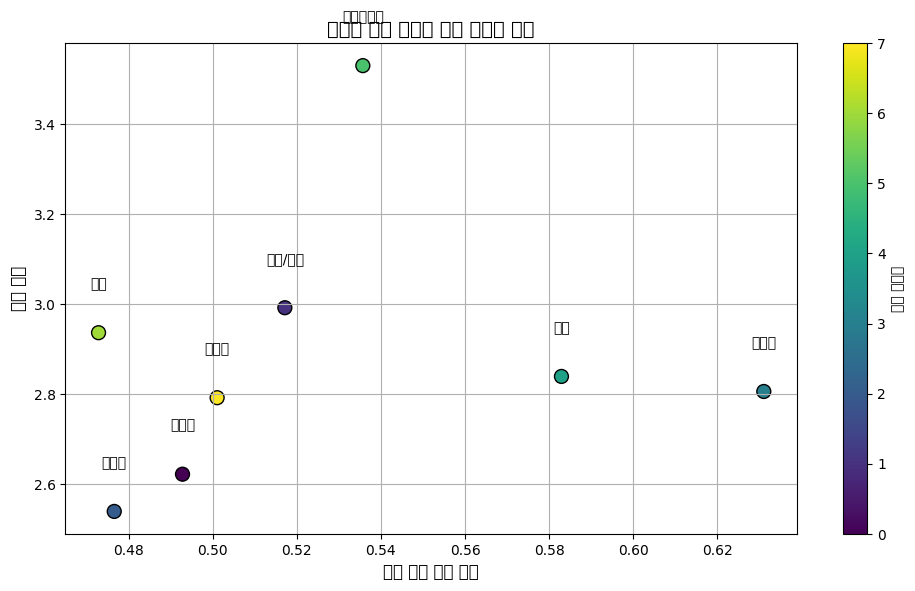

<ipython-input-9-18431dcc1b5d>:102: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  plt.tight_layout()
<ipython-input-9-18431dcc1b5d>:102: UserWarning: Glyph 47592 (\N{HANGUL SYLLABLE MAEN}) missing from current font.
  plt.tight_layout()
<ipython-input-9-18431dcc1b5d>:102: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  plt.tight_layout()
<ipython-input-9-18431dcc1b5d>:102: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  plt.tight_layout()
<ipython-input-9-18431dcc1b5d>:102: UserWarning: Glyph 48121 (\N{HANGUL SYLLABLE MIG}) missing from current font.
  plt.tight_layout()
<ipython-input-9-18431dcc1b5d>:102: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  plt.tight_layout()
<ipython-input-9-18431dcc1b5d>:102: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  plt.tight_layout()
<ipython-input-9-18431dcc1b5d>:102: UserWarning: Glyph 5286

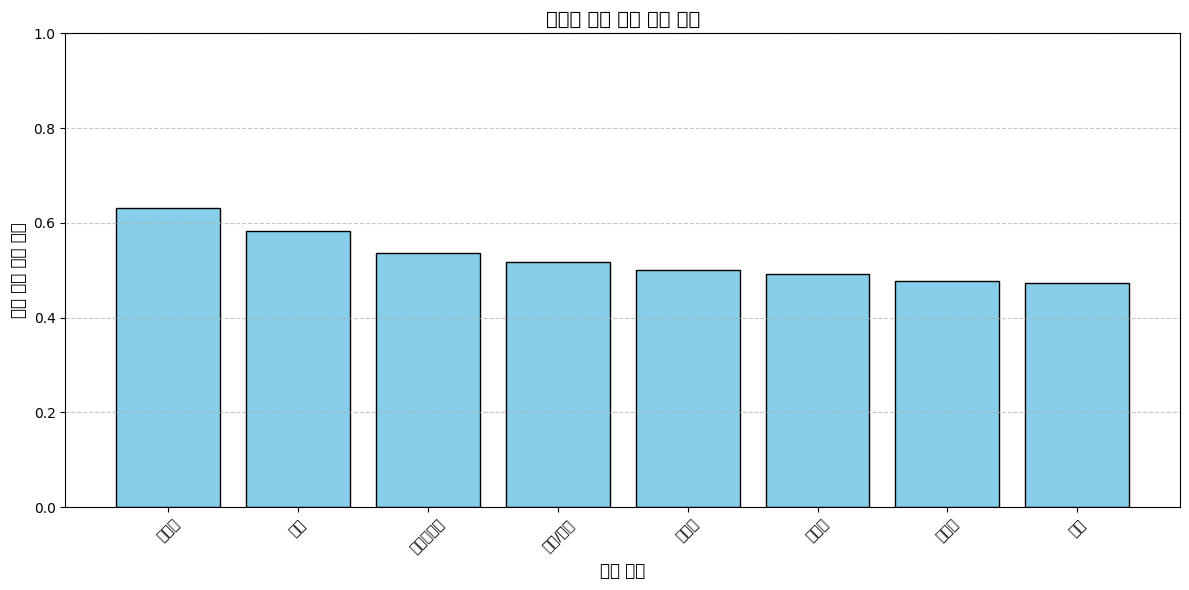

In [ ]:
!pip install tensorflow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1. 한글 폰트 설정
# 나눔 폰트 다운로드 및 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 나눔 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 2. 데이터 로드 및 전처리
file_path = '유튜브제외찐최종데이터.csv'  # 데이터 파일 경로
data = pd.read_csv(file_path)

# 레이블이 2인 행 제거, NaN 값 제거
data = data[(data['label'] != 2) & (data['label'].notna())]
data = data.dropna(subset=['cleaned', 'rating'])

# 'rating' 열을 float 형식으로 변환
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# 장르 리스트 추출
genres = data['genre'].unique()

# 3. 예측 결과 기반 통계 계산
predicted_results = []  # 모델의 예측 결과를 담을 리스트

for genre in genres:
    genre_data = data[data['genre'] == genre]
    sequences = tokenizer.texts_to_sequences(genre_data['cleaned'].astype(str))
    padded_sequences = pad_sequences(sequences, maxlen=130, padding='post', truncating='post')

    # 예측 수행
    predictions = model.predict(padded_sequences, batch_size=64)
    predicted_labels = (predictions >= 0.5).astype(int).flatten()  # 0.5 기준으로 긍정/부정 라벨 결정

    # 장르별 데이터 통계 계산
    genre_avg_sentiment = np.mean(predicted_labels)  # 평균 긍정 감성 비율
    genre_avg_rating = genre_data['rating'].mean()  # 평균 평점

    predicted_results.append({
        'genre': genre,
        'average_sentiment': genre_avg_sentiment,
        'average_rating': genre_avg_rating
    })

# 4. 데이터프레임 생성
results_df = pd.DataFrame(predicted_results)

# 5. 시각화
# 산점도: 평균 평점과 긍정 감성 비율
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    results_df['average_sentiment'],
    results_df['average_rating'],
    s=100,  # 점 크기
    c=np.arange(len(results_df['genre'])),  # 색상
    cmap='viridis',  # 컬러맵
    edgecolor='k'
)

for i, genre in enumerate(results_df['genre']):
    plt.text(
        results_df['average_sentiment'][i],
        results_df['average_rating'][i] + 0.1,
        genre,
        fontsize=10,
        ha='center'
    )

plt.colorbar(scatter, label='장르 인덱스')
plt.title('장르별 평균 감성과 평균 평점의 관계', fontsize=14)
plt.xlabel('평균 긍정 감성 비율', fontsize=12)
plt.ylabel('평균 평점', fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

# 막대 그래프: 장르별 평균 긍정 감성 비율
plt.figure(figsize=(12, 6))
results_df_sorted = results_df.sort_values(by='average_sentiment', ascending=False)
plt.bar(
    results_df_sorted['genre'],
    results_df_sorted['average_sentiment'],
    color='skyblue',
    edgecolor='k'
)
plt.title('장르별 평균 긍정 감성 비율', fontsize=14)
plt.xlabel('영화 장르', fontsize=12)
plt.ylabel('평균 긍정 감성 비율', fontsize=12)
plt.ylim(0, 1)  # 긍정 비율은 0~1 사이
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# 필요한 라이브러리 설치 및 폰트 캐시 갱신
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
import numpy as np

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨지지 않도록 설정

# 데이터 로드
data = pd.read_csv('your_dataset.csv')

# 데이터 전처리: 예시로 간단한 전처리를 추가합니다.
data.dropna(subset=['text_column'], inplace=True)  # NaN 값 제거
data['label'] = LabelEncoder().fit_transform(data['label'])  # 레이블 인코딩

# 텍스트 토큰화 및 패딩 처리
tokenizer = Tokenizer(num_words=10000)  # 가장 빈도가 높은 10000개의 단어만 사용
tokenizer.fit_on_texts(data['text_column'])
sequences = tokenizer.texts_to_sequences(data['text_column'])
padded_sequences = pad_sequences(sequences, maxlen=100)  # 시퀀스 패딩

# 모델 로드 및 예측
model = load_model('your_model.h5')
predictions = model.predict(padded_sequences)
predicted_labels = (predictions > 0.5).astype(int)  # 이진 분류 가정

# 평균 예측값 계산: 예를 들어 긍정 리뷰 비율 계산
average_prediction = np.mean(predicted_labels)

# 시각화
plt.figure(figsize=(10, 6))
plt.hist(predicted_labels, bins=np.arange(3) - 0.5, rwidth=0.8)
plt.title('예측 레이블 분포')
plt.xlabel('레이블')
plt.ylabel('빈도')
plt.xticks(ticks=[0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 예측 결과와 실제 데이터를 비교하는 추가적인 시각화
plt.figure(figsize=(10, 6))
plt.scatter(data['some_numerical_feature'], predictions.flatten(), alpha=0.5)
plt.title('특정 수치 특성 대비 예측 확률')
plt.xlabel('수치 특성')
plt.ylabel('예측 확률')
plt.grid(True)
plt.show()

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, GlobalMaxPool1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import Precision, Recall

# 데이터 로드 및 레이블 '2' 제거
file_path = '뉴뉴.csv'  # 실제 파일 경로로 변경하세요.
data = pd.read_csv(file_path)
data = data[data['label'] != 2]

# NaN 값 제거
data = data.dropna(subset=['cleaned', 'label'])

# 토크나이저 초기화 및 설정
tokenizer = Tokenizer(num_words=6000, oov_token="<OOV>")
tokenizer.fit_on_texts(data['cleaned'].astype(str))

# 장르별로 처리
genres = data['genre'].unique()
results = []

for genre in genres:
    print(f"Processing genre: {genre}")
    genre_data = data[data['genre'] == genre]

    # 토크나이즈 및 시퀀스 패딩
    sequences = tokenizer.texts_to_sequences(genre_data['cleaned'].astype(str))
    padded_sequences = pad_sequences(sequences, maxlen=130, padding='post', truncating='post')

    # 데이터 길이 확인 및 일치 여부 체크
    labels = np.array(genre_data['label'])
    if len(padded_sequences) != len(labels):
        print(f"Data length mismatch in genre {genre}: {len(padded_sequences)} vs {len(labels)}")
        continue

    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

    # 모델 정의
    model = Sequential([
        Embedding(6000, 128, input_length=130),
        Bidirectional(LSTM(32, return_sequences=True)),
        GlobalMaxPool1D(),
        Dense(20, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    # 모델 컴파일
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])

    # 모델 학습
    model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test), batch_size=64)

    # 모델 평가
    loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
    f1 = 2 * (precision * recall) / (precision + recall if precision + recall != 0 else 1)
    print(f"Results for genre {genre}: Accuracy: {accuracy*100:.2f}%, Precision: {precision*100:.2f}%, Recall: {recall*100:.2f}%, F1-score: {f1:.2f}")

    # 결과를 리스트에 추가
    results.append((genre, accuracy, precision, recall, f1))

# 결과를 DataFrame으로 변환
results_df = pd.DataFrame(results, columns=['Genre', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

# CSV 파일로 저장
results_df.to_csv('genre_sentiment_analysis_results.csv', index=False)

# 출력하여 사용자에게 알림
print("Results have been saved to 'genre_sentiment_analysis_results.csv'.")


Processing genre: 드라마


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
139/139 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.5840 - loss: 0.6818 - precision: 0.4440 - recall: 0.0543 - val_accuracy: 0.6978 - val_loss: 0.6063 - val_precision: 0.8433 - val_recall: 0.2888
Epoch 2/3
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7340 - loss: 0.5643 - precision: 0.7547 - recall: 0.5419 - val_accuracy: 0.7316 - val_loss: 0.5322 - val_precision: 0.7220 - val_recall: 0.5217
Epoch 3/3
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8043 - loss: 0.4375 - precision: 0.8377 - recall: 0.6574 - val_accuracy: 0.7334 - val_loss: 0.5454 - val_precision: 0.7080 - val_recall: 0.5537
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7238 - loss: 0.5543 - precision: 0.6966 - recall: 0.5442
Results for genre 드라마: Accuracy: 73.34%, Precision: 70.80%, Recall: 55.37%, F1-score: 0.62
Processing genre: 액션/무협
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


185/185 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5479 - loss: 0.6848 - precision_1: 0.5581 - recall_1: 0.8534 - val_accuracy: 0.6602 - val_loss: 0.6101 - val_precision_1: 0.7221 - val_recall_1: 0.5933
Epoch 2/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7130 - loss: 0.5633 - precision_1: 0.7483 - recall_1: 0.7139 - val_accuracy: 0.6819 - val_loss: 0.5725 - val_precision_1: 0.7376 - val_recall_1: 0.6293
Epoch 3/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7844 - loss: 0.4732 - precision_1: 0.8314 - recall_1: 0.7556 - val_accuracy: 0.6832 - val_loss: 0.5934 - val_precision_1: 0.7289 - val_recall_1: 0.6496
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6825 - loss: 0.5821 - precision_1: 0.7387 - recall_1: 0.6513
Results for genre 액션/무협: Accuracy: 68.32%, Precision: 72.89%, Recall: 64.96%, F1-score: 0.69
Processing genre: 스릴러
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.6386 - loss: 0.6659 - precision_2: 0.4702 - recall_2: 0.0719 - val_accuracy: 0.6502 - val_loss: 0.6364 - val_precision_2: 1.0000 - val_recall_2: 0.0230
Epoch 2/3
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6910 - loss: 0.6046 - precision_2: 0.6896 - recall_2: 0.2362 - val_accuracy: 0.7623 - val_loss: 0.5192 - val_precision_2: 0.8157 - val_recall_2: 0.4342
Epoch 3/3
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8189 - loss: 0.4440 - precision_2: 0.8297 - recall_2: 0.6145 - val_accuracy: 0.7414 - val_loss: 0.5375 - val_precision_2: 0.6626 - val_recall_2: 0.5658
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7312 - loss: 0.5482 - precision_2: 0.6203 - recall_2: 0.5115
Results for genre 스릴러: Accuracy: 74.14%, Precision: 66.26%, Recall: 56.58%, F1-score: 0.61
Processing genre: 로맨스
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.5403 - loss: 0.6872 - precision_3: 0.3635 - recall_3: 0.2457 - val_accuracy: 0.6724 - val_loss: 0.6558 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5935 - loss: 0.6710 - precision_3: 0.2943 - recall_3: 0.0231 - val_accuracy: 0.6724 - val_loss: 0.6403 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6021 - loss: 0.6842 - precision_3: 0.6042 - recall_3: 0.0830 - val_accuracy: 0.6724 - val_loss: 0.6414 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6983 - loss: 0.6301 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00
Results for genre 로맨스: Accuracy: 67.24%, Precision: 0.00%, Recall: 0.00%, F1-score: 0.00
Processing genre: 코믹
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.4889 - loss: 0.6934 - precision_4: 0.4976 - recall_4: 0.4671 - val_accuracy: 0.5044 - val_loss: 0.6921 - val_precision_4: 0.5044 - val_recall_4: 1.0000
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5263 - loss: 0.6881 - precision_4: 0.5241 - recall_4: 0.8966 - val_accuracy: 0.5511 - val_loss: 0.6871 - val_precision_4: 0.5325 - val_recall_4: 0.9031
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6279 - loss: 0.6700 - precision_4: 0.6105 - recall_4: 0.7886 - val_accuracy: 0.6222 - val_loss: 0.6620 - val_precision_4: 0.6067 - val_recall_4: 0.7137
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6006 - loss: 0.6588 - precision_4: 0.5741 - recall_4: 0.7352
Results for genre 코믹: Accuracy: 62.22%, Precision: 60.67%, Recall: 71.37%, F1-score: 0.66
Processing genre: 아포칼립스
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.7183 - loss: 0.6107 - precision_5: 0.7503 - recall_5: 0.9342 - val_accuracy: 0.7415 - val_loss: 0.5712 - val_precision_5: 0.7415 - val_recall_5: 1.0000
Epoch 2/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7517 - loss: 0.5671 - precision_5: 0.7536 - recall_5: 0.9966 - val_accuracy: 0.7415 - val_loss: 0.5595 - val_precision_5: 0.7415 - val_recall_5: 1.0000
Epoch 3/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7560 - loss: 0.5216 - precision_5: 0.7670 - recall_5: 0.9670 - val_accuracy: 0.7396 - val_loss: 0.5453 - val_precision_5: 0.7545 - val_recall_5: 0.9619
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7397 - loss: 0.5314 - precision_5: 0.7511 - recall_5: 0.9643
Results for genre 아포칼립스: Accuracy: 73.96%, Precision: 75.45%, Recall: 96.19%, F1-score: 0.85
Processing genre: 공포
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.4893 - loss: 0.6942 - precision_6: 0.3982 - recall_6: 0.2016 - val_accuracy: 0.5409 - val_loss: 0.6898 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5368 - loss: 0.6896 - precision_6: 0.6838 - recall_6: 0.0468 - val_accuracy: 0.5409 - val_loss: 0.6844 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6225 - loss: 0.6651 - precision_6: 0.6611 - recall_6: 0.3818 - val_accuracy: 0.6343 - val_loss: 0.6486 - val_precision_6: 0.6952 - val_recall_6: 0.3621
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6368 - loss: 0.6539 - precision_6: 0.6809 - recall_6: 0.3751
Results for genre 공포: Accuracy: 63.43%, Precision: 69.52%, Recall: 36.21%, F1-score: 0.48
Processing genre: 판타지
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.5428 - loss: 0.6846 - precision_7: 0.5385 - recall_7: 0.4647 - val_accuracy: 0.6942 - val_loss: 0.5947 - val_precision_7: 0.7466 - val_recall_7: 0.4944
Epoch 2/3
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7307 - loss: 0.5521 - precision_7: 0.7677 - recall_7: 0.6258 - val_accuracy: 0.6953 - val_loss: 0.5764 - val_precision_7: 0.6670 - val_recall_7: 0.6567
Epoch 3/3
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8028 - loss: 0.4425 - precision_7: 0.8591 - recall_7: 0.7124 - val_accuracy: 0.7069 - val_loss: 0.5695 - val_precision_7: 0.7027 - val_recall_7: 0.6144
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7079 - loss: 0.5624 - precision_7: 0.7037 - recall_7: 0.6211
Results for genre 판타지: Accuracy: 70.69%, Precision: 70.27%, Recall: 61.44%, F1-score: 0.66
Results have been saved to 'genre_sentiment_analysis_results.csv'.


In [ ]:
!pip install tensorflow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

<ipython-input-5-a584e2ff246c>:81: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-5-a584e2ff246c>:81: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  plt.tight_layout()
<ipython-input-5-a584e2ff246c>:81: UserWarning: Glyph 44557 (\N{HANGUL SYLLABLE GEUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-5-a584e2ff246c>:81: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-5-a584e2ff246c>:81: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.
  plt.tight_layout()
<ipython-input-5-a584e2ff246c>:81: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-5-a584e2ff246c>:81: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  plt.tight_layout()
<ipython-input-5-a584e2ff246c>:81: UserWarning: Glyph

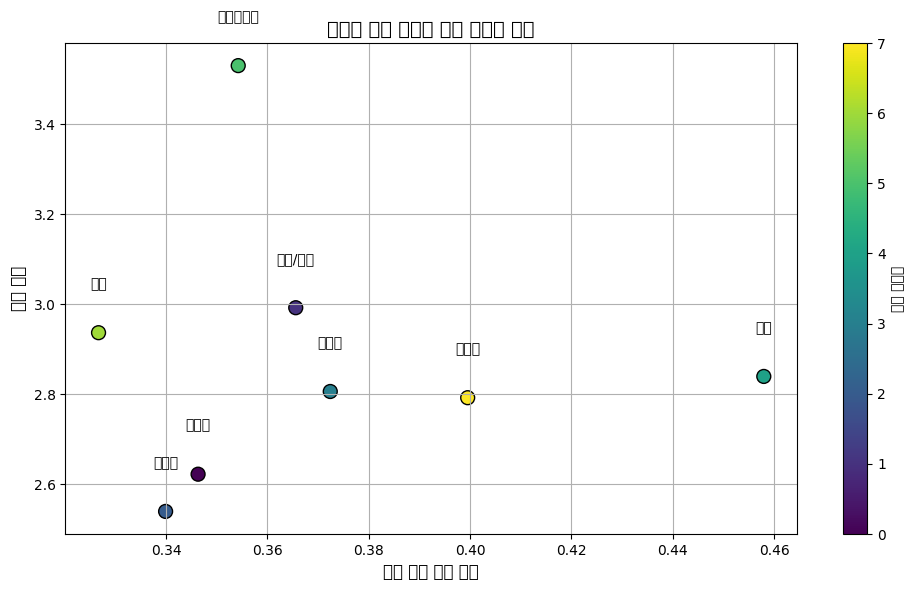

<ipython-input-5-a584e2ff246c>:99: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  plt.tight_layout()
<ipython-input-5-a584e2ff246c>:99: UserWarning: Glyph 48121 (\N{HANGUL SYLLABLE MIG}) missing from current font.
  plt.tight_layout()
<ipython-input-5-a584e2ff246c>:99: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  plt.tight_layout()
<ipython-input-5-a584e2ff246c>:99: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  plt.tight_layout()
<ipython-input-5-a584e2ff246c>:99: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
<ipython-input-5-a584e2ff246c>:99: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  plt.tight_layout()
<ipython-input-5-a584e2ff246c>:99: UserWarning: Glyph 47592 (\N{HANGUL SYLLABLE MAEN}) missing from current font.
  plt.tight_layout()
<ipython-input-5-a584e2ff246c>:99: UserWarning: Glyph 49828 (\N{H

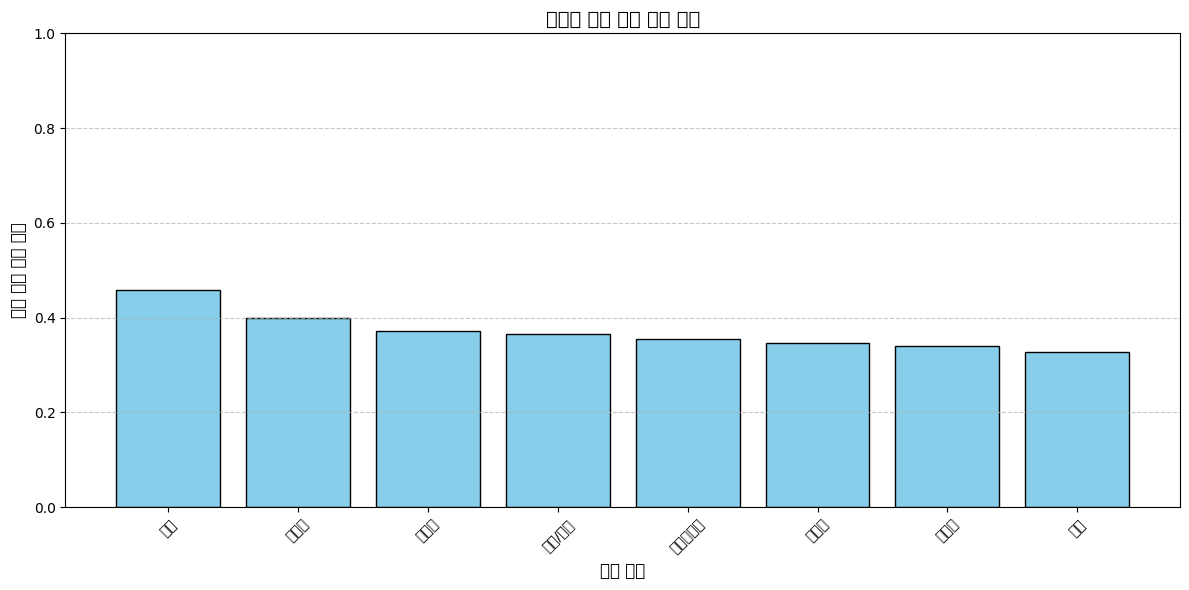

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 데이터 로드 및 전처리
file_path = 'sentiment_analysis_results.csv'  # 데이터 파일 경로
data = pd.read_csv(file_path)

# 레이블이 2인 행 제거, NaN 값 제거
data = data[(data['predicted_label'] != 2) & (data[''].notna())]
data = data.dropna(subset=['cleaned', 'rating'])

# 'rating' 열을 float 형식으로 변환
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# 장르 리스트 추출
genres = data['genre'].unique()

# 예측 결과 기반 통계 계산
predicted_results = []  # 모델의 예측 결과를 담을 리스트

for genre in genres:
    genre_data = data[data['genre'] == genre]
    sequences = tokenizer.texts_to_sequences(genre_data['cleaned'].astype(str))
    padded_sequences = pad_sequences(sequences, maxlen=130, padding='post', truncating='post')

    # 예측 수행
    predictions = model.predict(padded_sequences, batch_size=64)
    predicted_labels = (predictions >= 0.5).astype(int).flatten()  # 0.5 기준으로 긍정/부정 라벨 결정

    # 장르별 데이터 통계 계산
    genre_avg_sentiment = np.mean(predicted_labels)  # 평균 긍정 감성 비율
    genre_avg_rating = genre_data['rating'].mean()  # 평균 평점

    predicted_results.append({
        'genre': genre,
        'average_sentiment': genre_avg_sentiment,
        'average_rating': genre_avg_rating
    })

# 데이터프레임 생성
results_df = pd.DataFrame(predicted_results)

# 시각화
# 산점도: 평균 평점과 긍정 감성 비율
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    results_df['average_sentiment'],
    results_df['average_rating'],
    s=100,  # 점 크기
    c=np.arange(len(results_df['genre'])),  # 색상
    cmap='viridis',  # 컬러맵
    edgecolor='k'
)

for i, genre in enumerate(results_df['genre']):
    plt.text(
        results_df['average_sentiment'][i],
        results_df['average_rating'][i] + 0.1,
        genre,
        fontsize=10,
        ha='center'
    )

plt.colorbar(scatter, label='장르 인덱스')
plt.title('장르별 평균 감성과 평균 평점의 관계', fontsize=14)
plt.xlabel('평균 긍정 감성 비율', fontsize=12)
plt.ylabel('평균 평점', fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

# 막대 그래프: 장르별 평균 긍정 감성 비율
plt.figure(figsize=(12, 6))
results_df_sorted = results_df.sort_values(by='average_sentiment', ascending=False)
plt.bar(
    results_df_sorted['genre'],
    results_df_sorted['average_sentiment'],
    color='skyblue',
    edgecolor='k'
)
plt.title('장르별 평균 긍정 감성 비율', fontsize=14)
plt.xlabel('영화 장르', fontsize=12)
plt.ylabel('평균 긍정 감성 비율', fontsize=12)
plt.ylim(0, 1)  # 긍정 비율은 0~1 사이
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
!pip install tensorflow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, GlobalMaxPool1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import Precision, Recall

# 한글 폰트 설치 및 캐시 제거
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 데이터 로드
file_path = 'sentiment_analysis_results.csv'
data = pd.read_csv(file_path)
data = data[(data['label'] != 2) & (data['label'].notna())]
data = data.dropna(subset=['cleaned', 'label'])
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# 토크나이저 설정
tokenizer = Tokenizer(num_words=6000, oov_token="<OOV>")
tokenizer.fit_on_texts(data['cleaned'].astype(str))

# 결과 저장을 위한 리스트
predicted_results = []

# 장르별 처리
for genre in data['genre'].unique():
    genre_data = data[data['genre'] == genre]
    sequences = tokenizer.texts_to_sequences(genre_data['cleaned'].astype(str))
    padded_sequences = pad_sequences(sequences, maxlen=130, padding='post', truncating='post')

    # 모델 정의 및 컴파일
    model = Sequential([
        Embedding(6000, 128),
        Bidirectional(LSTM(32, return_sequences=True)),
        GlobalMaxPool1D(),
        Dense(20, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])

    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(padded_sequences, genre_data['label'].values, test_size=0.2, random_state=42)
    model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test), batch_size=64)

    # 예측 및 결과 계산
    predictions = model.predict(X_test)
    predicted_labels = (predictions >= 0.5).astype(int).flatten()
    genre_avg_sentiment = np.mean(predicted_labels)
    genre_avg_rating = genre_data['rating'].mean()

    predicted_results.append({
        'genre': genre,
        'average_sentiment': genre_avg_sentiment,
        'average_rating': genre_avg_rating
    })

# 결과 DataFrame 생성 및 저장
results_df = pd.DataFrame(predicted_results)
results_df.to_csv('genre_sentiment_analysis_results.csv', index=False)

# 시각화
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    results_df['average_sentiment'],
    results_df['average_rating'],
    s=100, c=np.arange(len(results_df['genre'])), cmap='viridis', edgecolor='k'
)
plt.colorbar(scatter, label='장르 인덱스')
plt.title('장르별 평균 감성과 평균 평점의 관계')
plt.xlabel('평균 긍정 감성 비율')
plt.ylabel('평균 평점')
plt.grid(True)
plt.tight_layout()
plt.show()

# 막대 그래프
plt.figure(figsize=(12, 6))
results_df_sorted = results_df.sort_values(by='average_sentiment', ascending=False)
plt.bar(results_df_sorted['genre'], results_df_sorted['average_sentiment'], color='skyblue', edgecolor='k')
plt.title('장르별 평균 긍정 감성 비율')
plt.xlabel('영화 장르')
plt.ylabel('평균 긍정 감성 비율')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

KeyboardInterrupt: 

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

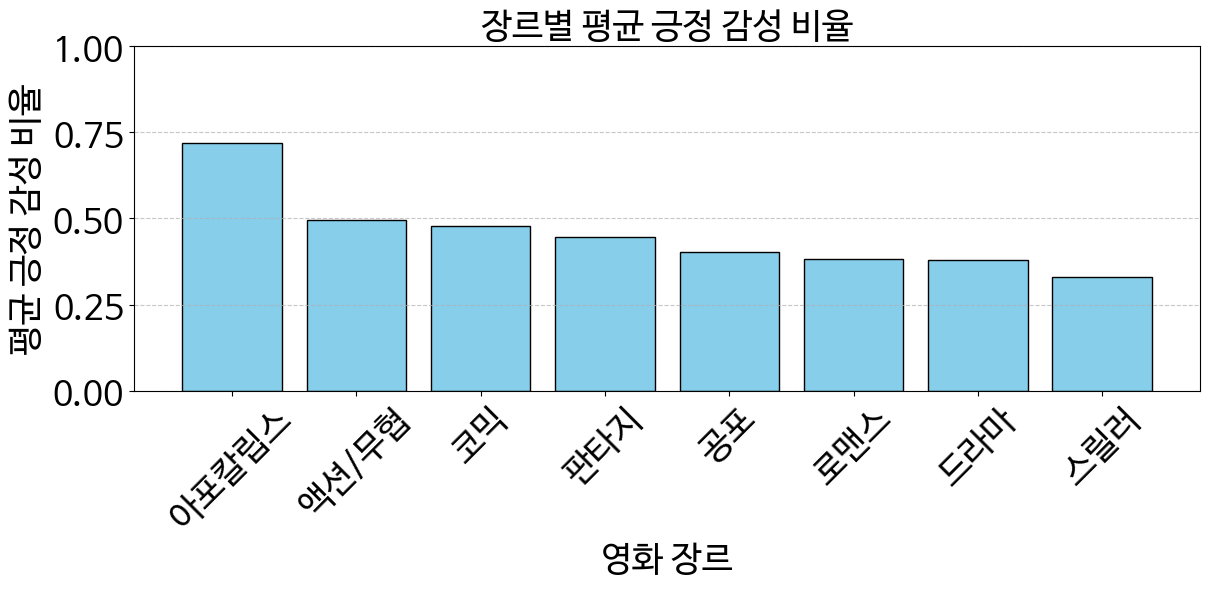

In [ ]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 폰트 경로를 직접 지정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

plt.rc('font', family=font_prop.get_name())
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 데이터 로드 및 전처리
file_path = 'sentiment_analysis_results.csv'  # 데이터 파일 경로
data = pd.read_csv(file_path)

# NaN 값 제거
data = data.dropna(subset=['predicted_label', 'rating', 'genre'])

# 'rating' 열을 float 형식으로 변환
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# 장르 리스트 추출
genres = data['genre'].unique()

# 예측 결과 기반 통계 계산
predicted_results = []  # 모델의 예측 결과를 담을 리스트

for genre in genres:
    genre_data = data[data['genre'] == genre]

    # 장르별 데이터 통계 계산
    genre_avg_sentiment = genre_data['predicted_label'].mean()  # 평균 긍정 감성 비율
    genre_avg_rating = genre_data['rating'].mean()  # 평균 평점

    predicted_results.append({
        'genre': genre,
        'average_sentiment': genre_avg_sentiment,
        'average_rating': genre_avg_rating
    })

# 데이터프레임 생성
results_df = pd.DataFrame(predicted_results)
'''
# 시각화
# 산점도: 평균 평점과 긍정 감성 비율
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    results_df['average_sentiment'],
    results_df['average_rating'],
    s=100,  # 점 크기
    c=np.arange(len(results_df['genre'])),  # 색상
    cmap='viridis',  # 컬러맵
    edgecolor='k'
)

for i, genre in enumerate(results_df['genre']):
    plt.text(
        results_df['average_sentiment'][i],
        results_df['average_rating'][i] + 0.1,
        genre,
        fontsize=10,
        ha='center'
    )

plt.colorbar(scatter, label='장르 인덱스')
plt.title('장르별 평균 감성과 평균 평점의 관계', fontsize=20, fontproperties=font_prop)
plt.xlabel('평균 긍정 감성 비율', fontsize=20, fontproperties=font_prop)
plt.ylabel('평균 평점', fontsize=20, fontproperties=font_prop)
plt.grid()
plt.tight_layout()
plt.show()'''

# 막대 그래프: 장르별 평균 긍정 감성 비율
plt.figure(figsize=(12, 6))
results_df_sorted = results_df.sort_values(by='average_sentiment', ascending=False)
plt.bar(
    results_df_sorted['genre'],
    results_df_sorted['average_sentiment'],
    color='skyblue',
    edgecolor='k'
)
# 그래프 설정
title_font = font_prop.copy()
title_font.set_size(25)

plt.title('장르별 평균 긍정 감성 비율', fontproperties=title_font)
#plt.title('장르별 평균 긍정 감성 비율', fontsize=25,fontproperties=font_prop)
plt.xlabel('영화 장르', fontsize=25, fontproperties=font_prop)
plt.ylabel('평균 긍정 감성 비율', fontsize=25, fontproperties=font_prop)
plt.ylim(0, 1)  # 긍정 비율은 0~1 사이
'''plt.xticks(rotation=45, fontsize=20, fontproperties=font_prop)
plt.yticks(rotation=45, fontsize=20, fontproperties=font_prop)'''
# xticks, yticks 폰트 크기 및 폰트 적용
plt.xticks(rotation=45, fontsize=25, fontproperties=font_prop)
plt.yticks(fontsize=25, fontproperties=font_prop)

# tick_params로 x, y ticks 폰트 크기 설정
plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [ ]:
# 설치된 모든 폰트를 확인
!rm -rf ~/.cache/matplotlib